<a href="https://colab.research.google.com/github/jayllfpt/FPTU-ADY201m-DataVisualization/blob/main/%5BFPTU%5DADY201m_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualization**

In [1]:
#import data - suv data in kaggle 
#https://www.kaggle.com/code/rishikesh247/suv-prediction

!gdown --id 1ZDijivz2bdClW_-Bp3iuEjQADsnISQc4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZDijivz2bdClW_-Bp3iuEjQADsnISQc4
To: /content/suv_data.csv
100% 10.5k/10.5k [00:00<00:00, 15.3MB/s]


In [19]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="whitegrid")

In [20]:
df = pd.read_csv('suv_data.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
print(df.columns)
dfMale = df[df['Gender'] == 'Male']
dfFemale = df[df['Gender'] == 'Female']
df100 = df.head(100)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


Column Chart

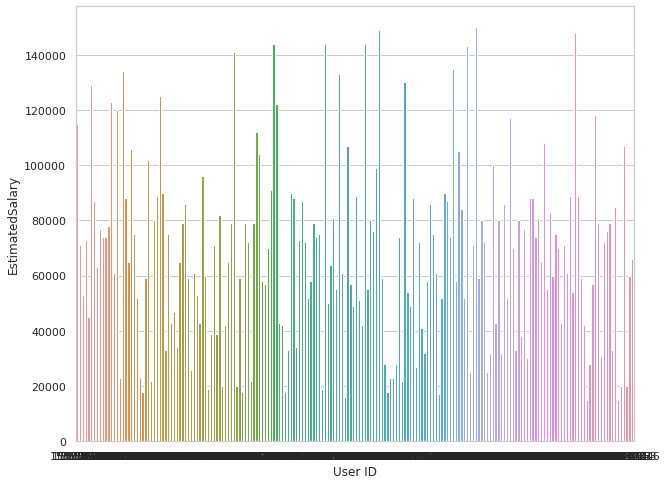

In [23]:
#Column Chart
sns.barplot(data = dfMale, x = 'User ID', y = 'EstimatedSalary')

Line Chart

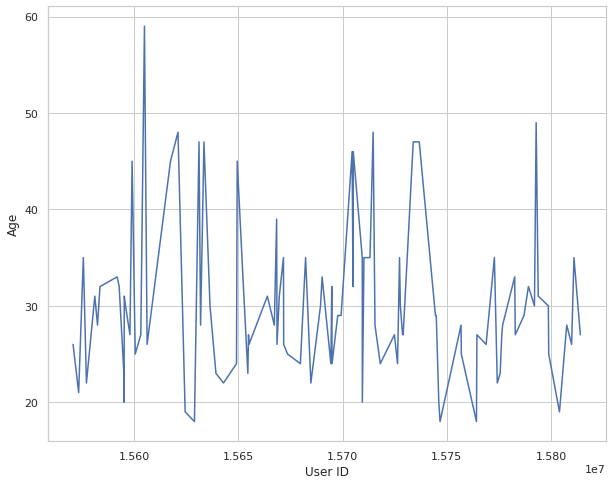

In [25]:
#line chart
sns.lineplot(data = df100, x = 'User ID', y = 'Age')

Pie chart

['Purchased', 'Not Purchased'] [35.75, 64.25] 400


([<matplotlib.patches.Wedge at 0x7f5e33a29c10>,
 [Text(0.4761598805222096, 0.9916006092076968, 'Purchased'),
  Text(-0.47615997336255733, -0.9916005646263867, 'Not Purchased')],
 [Text(0.25972357119393247, 0.5408730595678345, '36%'),
  Text(-0.2597236218341221, -0.5408730352507563, '64%')])

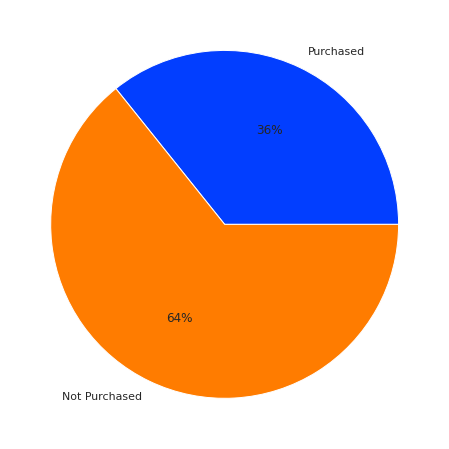

In [43]:
import matplotlib.pyplot as plt
#pie chart

v0 = df[df['Purchased'] == 0]['Purchased'].count()
v1 = df[df['Purchased'] == 1]['Purchased'].count()
total = df['Purchased'].count()

data = ['Purchased', 'Not Purchased']
keys = []
keys.append(float(v1/total) * 100)
keys.append(float(v0/total) * 100)

print(data, keys, total)
palette_color = sns.color_palette('bright')
plt.pie(keys, labels= data, colors=palette_color, autopct='%.0f%%')


Dual Axis chart

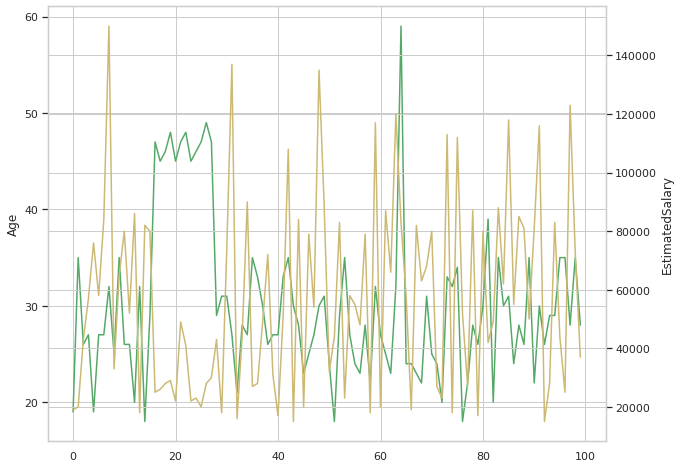

In [52]:
#Dual axis chart
sns.lineplot(data=df100['Age'], color="g")
ax2 = plt.twinx()
sns.lineplot(data=df100['EstimatedSalary'], color="y", ax=ax2)

Area chart

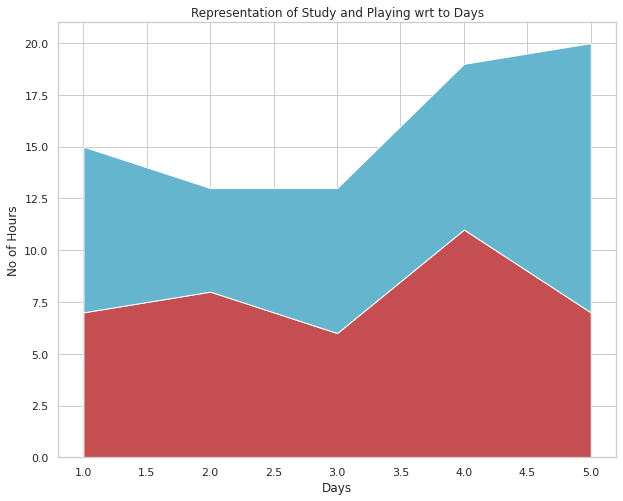

In [66]:
#area chart
days = [1, 2, 3, 4, 5]
Studying = [7, 8, 6, 11, 7]
playing =  [8, 5, 7, 8, 13]

plt.stackplot(days, Studying, playing, colors =['r', 'c'])
plt.xlabel('Days')
plt.ylabel('No of Hours')
plt.title('Representation of Study and Playing wrt to Days')
plt.show()

Stacked Bar Chart

130 66 127 77


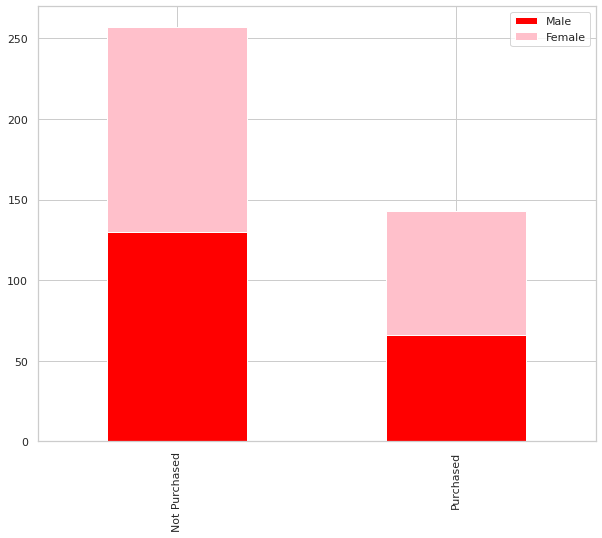

In [73]:
#stacked bar chart
m0 = dfMale[dfMale['Purchased'] == 0]['Purchased'].count()
m1 = dfMale[dfMale['Purchased'] == 1]['Purchased'].count()
f0 = dfFemale[dfFemale['Purchased'] == 0]['Purchased'].count()
f1 = dfFemale[dfFemale['Purchased'] == 1]['Purchased'].count()
print(m0, m1, f0, f1)
data = pd.DataFrame({'Male': [m0, m1],
                         'Female': [f0, f1], },
                        index=['Not Purchased', 'Purchased'])
data.plot(kind='bar', stacked=True, color=['red', 'pink'])

Scatter plot chart

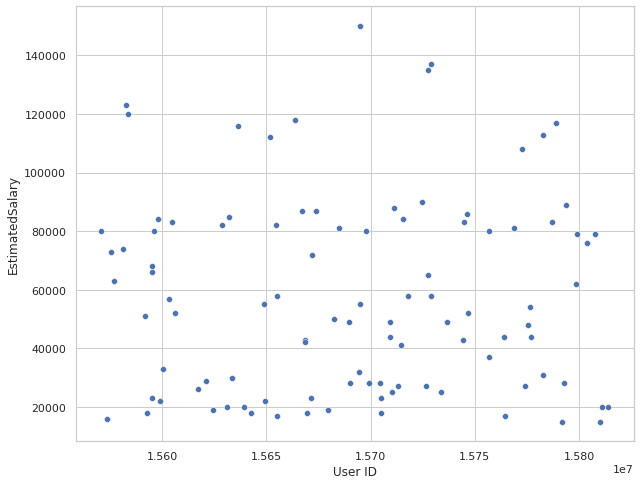

In [76]:
#scatter plot chart
sns.scatterplot(data = df100, x = 'User ID', y = 'EstimatedSalary')

Box Plot

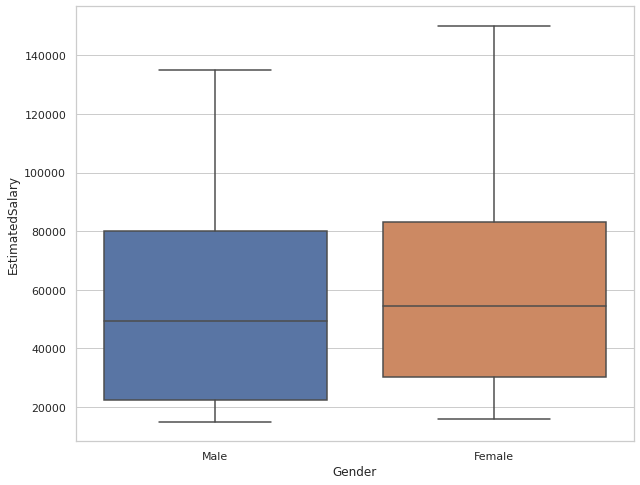

In [80]:
#box plot
sns.boxplot(data = df100, x = 'Gender', y = 'EstimatedSalary')

Waterfall chart

In [81]:
!pip install waterfallcharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=f0c9b8d5044a5a55b56b5e315e0697953350ae623daa781cca22a4a31d175f98
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

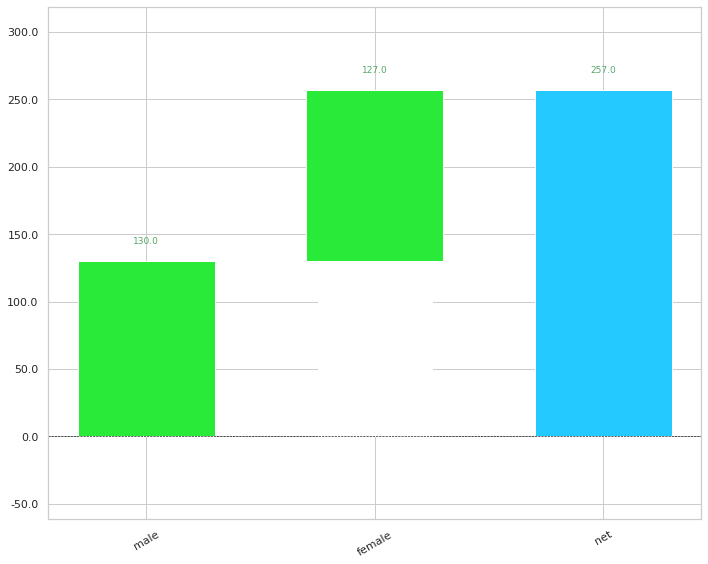

In [86]:
import waterfall_chart
waterfall_chart.plot(['male', 'female'], [m0, f0])

Funnel Chart

In [93]:
import plotly.express as px
data = dict(
    number=[df['User ID'].count(), df[df['Purchased']==1]['Purchased'].count()],
    stage=['Gender', 'Purchased'])
fig = px.funnel(data, x='number', y='stage')
fig.show()

Bullet Chart

In [95]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    value = v0,
    delta = {'reference': total},
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Purchased"}))
fig.update_layout(height = 250)

fig.show()

Heatmap

The data to be plotted:

[[38 76 40 97  5 29 29 12 58 15]
 [76 63 91 34 93  5 39 40 81 49]
 [89 77 39 39 79 71  9 25 50 28]
 [50 17  5 50 88 33 39 88 78 50]
 [42 32 90 55 86 32  2 34 79 33]
 [24 99  1 42 22 74 32 34  4  2]
 [73 78 58  7 56 46 44 15 85 32]
 [61 28 57 10 15 85 35 48 68 90]
 [ 9 22 67 51 13 21 85 88 47 37]
 [29 61 71  8 80 10 12 99 89 59]]


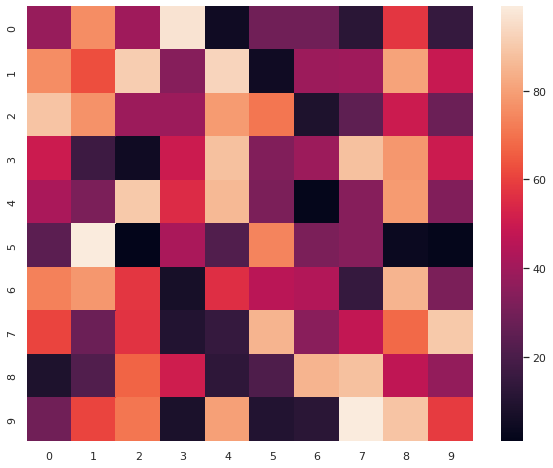

In [104]:
import numpy as np
data = np.random.randint(low = 1,
                         high = 100,
                         size = (10, 10))
print("The data to be plotted:\n")
print(data)
hm = sns.heatmap(data = data)
plt.show()